# Trabalho 5 - Algoritmo Genético

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

NUM_INDIVIDUOS = 4       # População inicial (pode aumentar até 30)
NUM_GERACOES = 5         # Número de gerações (pode aumentar até 20)
TAXA_CROSSOVER = 0.70    # 70%
TAXA_MUTACAO = 0.01      # 1%
INTERVALO = [-10, 10]
NUM_BITS = 10            # Precisão da representação binária

In [ ]:
# Função Objetivo
def f(x):
    return x**2 - 3*x + 4

# Decodificação: Binário -> Real
def bin_to_real(bin_list, intervalo, num_bits):
    inteiro = int("".join(str(b) for b in bin_list), 2)
    min_val, max_val = intervalo
    precisao = (max_val - min_val) / (2**num_bits - 1)
    return min_val + inteiro * precisao

# Criar Indivíduo (Vetor Binário)
def criar_individuo(num_bits):
    return [random.randint(0, 1) for _ in range(num_bits)]

# Criar População Inicial
def criar_populacao(num_individuos, num_bits):
    return [criar_individuo(num_bits) for _ in range(num_individuos)]

In [41]:
# Operadores Genéticos

def selecao_torneio(populacao, fitnesses, k=3):
    # Seleciona k indivíduos aleatoriamente e retorna o melhor
    selecionados = random.sample(list(zip(populacao, fitnesses)), k=min(k, len(populacao)))
    selecionados.sort(key=lambda x: x[1], reverse=True) # Maior fitness primeiro
    return selecionados[0][0]

def crossover(pai1, pai2, taxa_crossover):
    if random.random() < taxa_crossover:
        ponto_corte = random.randint(1, len(pai1) - 1)
        filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
        filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
        return filho1, filho2
    return pai1[:], pai2[:]

def mutacao(individuo, taxa_mutacao):
    novo_individuo = individuo[:]
    for i in range(len(novo_individuo)):
        if random.random() < taxa_mutacao:
            novo_individuo[i] = 1 - novo_individuo[i] # Inverte bit
    return novo_individuo

In [60]:
# Execução do Algoritmo Genético

populacao = criar_populacao(NUM_INDIVIDUOS, NUM_BITS)
melhores_fitness_por_geracao = []
media_fitness_por_geracao = []

print(f"Iniciando AG com {NUM_INDIVIDUOS} indivíduos por {NUM_GERACOES} gerações.\n")

for geracao in range(NUM_GERACOES):
    # Avaliação
    valores_reais = [bin_to_real(ind, INTERVALO, NUM_BITS) for ind in populacao]
    fitnesses = [f(x) for x in valores_reais]
    
    # Estatísticas
    melhor_fit = max(fitnesses)
    media_fit = np.mean(fitnesses)
    melhor_ind_idx = fitnesses.index(melhor_fit)
    melhor_x = valores_reais[melhor_ind_idx]
    
    melhores_fitness_por_geracao.append(melhor_fit)
    media_fitness_por_geracao.append(media_fit)
    
    print(f"Geração {geracao+1}: Melhor Fitness = {melhor_fit:.4f} (x = {melhor_x:.4f})")
    
    # Nova População
    nova_populacao = []
    while len(nova_populacao) < NUM_INDIVIDUOS:
        # Seleção
        pai1 = selecao_torneio(populacao, fitnesses)
        pai2 = selecao_torneio(populacao, fitnesses)
        
        # Crossover
        filho1, filho2 = crossover(pai1, pai2, TAXA_CROSSOVER)
        
        # Mutação
        filho1 = mutacao(filho1, TAXA_MUTACAO)
        filho2 = mutacao(filho2, TAXA_MUTACAO)
        
        nova_populacao.extend([filho1, filho2])
    
    # Ajusta tamanho da população se exceder (caso ímpar, etc)
    populacao = nova_populacao[:NUM_INDIVIDUOS]

# Resultado Final
melhor_geral_idx = np.argmax(fitnesses)
melhor_x_final = valores_reais[melhor_geral_idx]
melhor_fit_final = fitnesses[melhor_geral_idx]

print(f"\nMelhor solução encontrada: x = {melhor_x_final:.4f}, f(x) = {melhor_fit_final:.4f}")

Iniciando AG com 4 indivíduos por 5 gerações.

Geração 1: Melhor Fitness = 128.6591 (x = -9.7654)
Geração 2: Melhor Fitness = 128.6591 (x = -9.7654)
Geração 3: Melhor Fitness = 128.6591 (x = -9.7654)
Geração 4: Melhor Fitness = 128.6591 (x = -9.7654)
Geração 5: Melhor Fitness = 128.6591 (x = -9.7654)

Melhor solução encontrada: x = -9.7654, f(x) = 128.6591


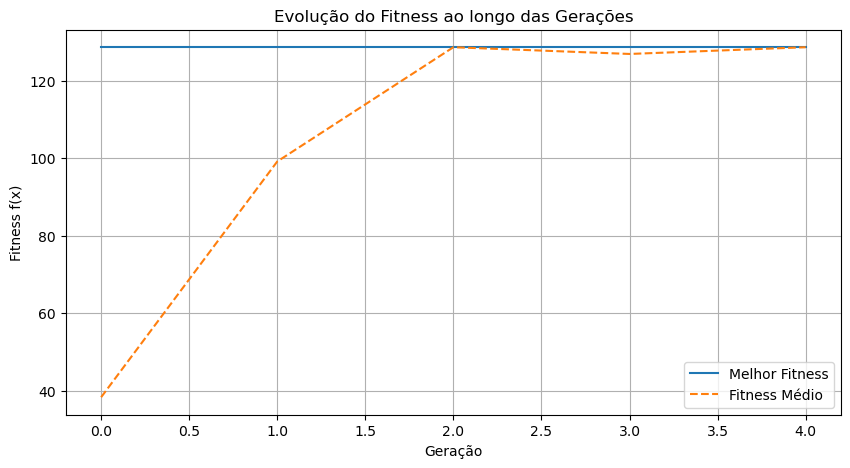

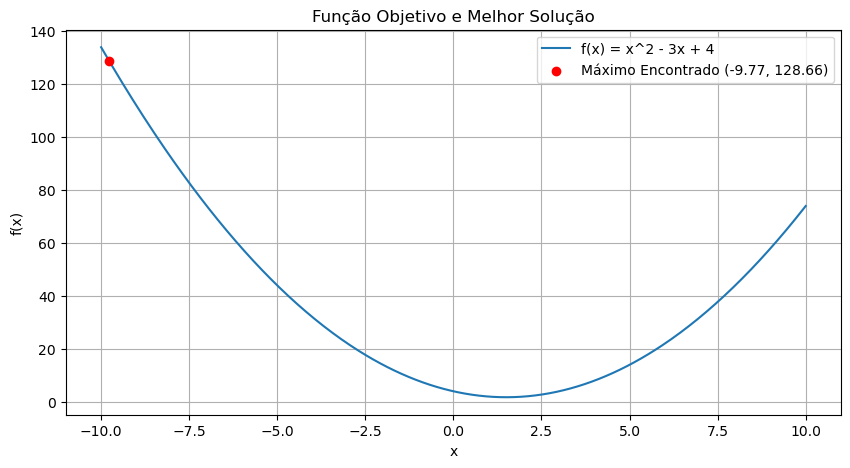

In [61]:
# Visualização
plt.figure(figsize=(10, 5))
plt.plot(melhores_fitness_por_geracao, label='Melhor Fitness')
plt.plot(media_fitness_por_geracao, label='Fitness Médio', linestyle='--')
plt.title('Evolução do Fitness ao longo das Gerações')
plt.xlabel('Geração')
plt.ylabel('Fitness f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Visualização da Função e do Ponto Encontrado
x = np.linspace(INTERVALO[0], INTERVALO[1], 400)
y = f(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = x^2 - 3x + 4')
plt.scatter(melhor_x_final, melhor_fit_final, color='red', zorder=5, label=f'Máximo Encontrado ({melhor_x_final:.2f}, {melhor_fit_final:.2f})')
plt.title('Função Objetivo e Melhor Solução')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## Testes Comparativos

In [44]:
# Função para executar o AG com parâmetros customizados
def executar_ag(num_individuos, num_geracoes, taxa_crossover=0.70, taxa_mutacao=0.01, num_bits=10, intervalo=[-10, 10]):
    populacao = criar_populacao(num_individuos, num_bits)
    melhores = []
    
    for geracao in range(num_geracoes):
        valores_reais = [bin_to_real(ind, intervalo, num_bits) for ind in populacao]
        fitnesses = [f(x) for x in valores_reais]
        melhores.append(max(fitnesses))
        
        nova_populacao = []
        while len(nova_populacao) < num_individuos:
            pai1 = selecao_torneio(populacao, fitnesses)
            pai2 = selecao_torneio(populacao, fitnesses)
            filho1, filho2 = crossover(pai1, pai2, taxa_crossover)
            filho1 = mutacao(filho1, taxa_mutacao)
            filho2 = mutacao(filho2, taxa_mutacao)
            nova_populacao.extend([filho1, filho2])
        populacao = nova_populacao[:num_individuos]
    
    # Avaliação final
    valores_reais = [bin_to_real(ind, intervalo, num_bits) for ind in populacao]
    fitnesses = [f(x) for x in valores_reais]
    melhor_idx = np.argmax(fitnesses)
    
    return {
        'melhor_x': valores_reais[melhor_idx],
        'melhor_fitness': fitnesses[melhor_idx],
        'historico': melhores
    }

/var/folders/gd/2lywb1vx57s0_k1cpy2c2c6r0000gn/T/ipykernel_79817/3927156276.py:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


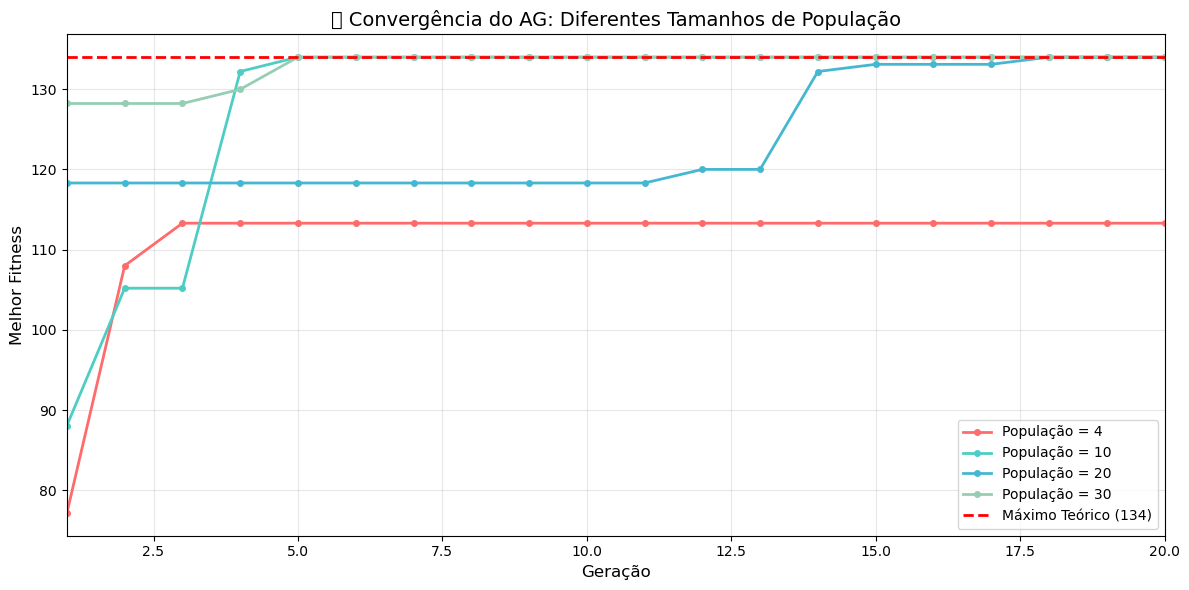

In [45]:
# GRÁFICO COMBINADO: Evolução do Fitness ao longo das Gerações para diferentes populações
fig, ax = plt.subplots(figsize=(12, 6))

populacoes_evolucao = [4, 10, 20, 30]
num_geracoes_evolucao = 20
cores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for pop, cor in zip(populacoes_evolucao, cores):
    resultado = executar_ag(num_individuos=pop, num_geracoes=num_geracoes_evolucao)
    ax.plot(range(1, num_geracoes_evolucao + 1), resultado['historico'], 
            marker='o', markersize=4, linewidth=2, color=cor,
            label=f'População = {pop}')

ax.axhline(y=134, color='red', linestyle='--', linewidth=2, label='Máximo Teórico (134)')
ax.set_xlabel('Geração', fontsize=12)
ax.set_ylabel('Melhor Fitness', fontsize=12)
ax.set_title('📈 Convergência do AG: Diferentes Tamanhos de População', fontsize=14)
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
ax.set_xlim(1, num_geracoes_evolucao)

plt.tight_layout()
plt.show()

In [62]:
# TESTES E TABELA RESUMO

# Configuração dos testes
populacoes = [4, 10, 20, 30]
geracoes_lista = [5, 10, 15, 20]
num_execucoes = 5

# TESTE 1: Variando População (10 gerações fixas)
resultados_populacao = {}
for pop in populacoes:
    melhores_fitness = []
    for _ in range(num_execucoes):
        resultado = executar_ag(num_individuos=pop, num_geracoes=10)
        melhores_fitness.append(resultado['melhor_fitness'])
    resultados_populacao[pop] = {
        'media': np.mean(melhores_fitness),
        'desvio': np.std(melhores_fitness)
    }

# TESTE 2: Variando Gerações (10 indivíduos fixos)
resultados_geracoes = {}
for ger in geracoes_lista:
    melhores_fitness = []
    for _ in range(num_execucoes):
        resultado = executar_ag(num_individuos=10, num_geracoes=ger)
        melhores_fitness.append(resultado['melhor_fitness'])
    resultados_geracoes[ger] = {
        'media': np.mean(melhores_fitness),
        'desvio': np.std(melhores_fitness)
    }

# TABELA RESUMO
print("\nVariando População (10 gerações fixas)")
print("-" * 50)
print(f"{'População':<12} {'Média':<12} {'Desvio':<12} {'% do Ótimo':<12}")
print("-" * 50)
for pop in populacoes:
    media = resultados_populacao[pop]['media']
    desvio = resultados_populacao[pop]['desvio']
    percentual = (media / 134) * 100
    print(f"{pop:<12} {media:<12.2f} {desvio:<12.2f} {percentual:<12.1f}%")

print("\nVariando Gerações (10 indivíduos fixos)")
print("-" * 50)
print(f"{'Gerações':<12} {'Média':<12} {'Desvio':<12} {'% do Ótimo':<12}")
print("-" * 50)
for ger in geracoes_lista:
    media = resultados_geracoes[ger]['media']
    desvio = resultados_geracoes[ger]['desvio']
    percentual = (media / 134) * 100
    print(f"{ger:<12} {media:<12.2f} {desvio:<12.2f} {percentual:<12.1f}%")



Variando População (10 gerações fixas)
--------------------------------------------------
População    Média        Desvio       % do Ótimo  
--------------------------------------------------
4            95.86        45.07        71.5        %
10           102.87       37.32        76.8        %
20           132.32       3.15         98.7        %
30           131.20       5.60         97.9        %

Variando Gerações (10 indivíduos fixos)
--------------------------------------------------
Gerações     Média        Desvio       % do Ótimo  
--------------------------------------------------
5            128.79       7.87         96.1        %
10           129.86       8.28         96.9        %
15           116.72       19.86        87.1        %
20           111.47       27.18        83.2        %
